## Bigram-
* a statistical model that predicts the likelihood of a word in a sequence based on the previous word.

In [21]:
import torch #tensors/matrices instead of arrays 
device= 'cuda' if torch.cuda.is_available() else 'cpu'
print (device)

cpu


In [1]:
#train on a small dataset- wizard_of_oz.txt

In [2]:
with open ('wizard_of_oz.txt', 'r', encoding= 'utf-8') as f:
    text= f.read()
print (len(text))


232309


In [3]:
print(text[:200])

﻿  DOROTHY AND THE WIZARD IN OZ

  BY

  L. FRANK BAUM

  AUTHOR OF THE WIZARD OF OZ, THE LAND OF OZ, OZMA OF OZ, ETC.

  ILLUSTRATED BY JOHN R. NEILL

  BOOKS OF WONDER WILLIAM MORROW & CO., INC. NEW


In [5]:
#vocab list- all characters in this text
chars= sorted(set(text))
print(chars)
print (len(chars))

['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\ufeff']
81


### Tokenizer
* consists of an encoder and a decoder
* encoder converts each element of this array to an integer.
* below is a character-level tokenizer, used when we have a limited vocabulary.
*  we can have word-level and sub-word tokenizers as well. 

In [12]:
x= 'abc'
enumerate(x)

In [13]:
list(enumerate(x))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [6]:
#tokenizer
string_to_int= { ch:i for i,ch in enumerate(chars)} #string to integers
int_to_string= {i:ch for i,ch in enumerate(chars)}

encode= lambda s: [string_to_int[c] for c in s] #encode chars into intrgers
decode= lambda l: ''.join([int_to_string[i] for i in l])


In [10]:
a= encode("hello")
a

[61, 58, 65, 65, 68]

In [9]:
decode(a)

'hello'

In [16]:
#tokenizer using tensors
string_to_int= { ch:i for i,ch in enumerate(chars)} #string to integers
int_to_string= {i:ch for i,ch in enumerate(chars)}

encode= lambda s: [string_to_int[c] for c in s] #encode chars into intrgers
decode= lambda l: ''.join([int_to_string[i] for i in l])

data= torch.tensor(encode(text), dtype= torch.long)
print(data[:100])

tensor([80,  1,  1, 28, 39, 42, 39, 44, 32, 49,  1, 25, 38, 28,  1, 44, 32, 29,
         1, 47, 33, 50, 25, 42, 28,  1, 33, 38,  1, 39, 50,  0,  0,  1,  1, 26,
        49,  0,  0,  1,  1, 36, 11,  1, 30, 42, 25, 38, 35,  1, 26, 25, 45, 37,
         0,  0,  1,  1, 25, 45, 44, 32, 39, 42,  1, 39, 30,  1, 44, 32, 29,  1,
        47, 33, 50, 25, 42, 28,  1, 39, 30,  1, 39, 50,  9,  1, 44, 32, 29,  1,
        36, 25, 38, 28,  1, 39, 30,  1, 39, 50])


### Train and Val set split
* concept of block_size
* 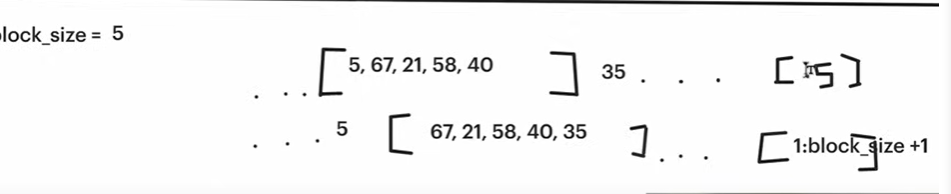

In [18]:
n= int(0.8* len(data))
train_data= data[:n]
val_data= data[n:]

In [20]:
block_size= 8
x= train_data[:block_size]
y= train_data[1:block_size+1] #offset by 1 ->target

for t in range(block_size):
    context= x[:t+1]
    target= y[t]
    print("when input is", context, 'target is', target)

when input is tensor([80]) target is tensor(1)
when input is tensor([80,  1]) target is tensor(1)
when input is tensor([80,  1,  1]) target is tensor(28)
when input is tensor([80,  1,  1, 28]) target is tensor(39)
when input is tensor([80,  1,  1, 28, 39]) target is tensor(42)
when input is tensor([80,  1,  1, 28, 39, 42]) target is tensor(39)
when input is tensor([80,  1,  1, 28, 39, 42, 39]) target is tensor(44)
when input is tensor([80,  1,  1, 28, 39, 42, 39, 44]) target is tensor(32)


* In order to scale language models, make multiple blocks and stack them.
* Block size is the length of each sequence and the batch size is how many of these are done at the same time, parallely.
*  use cuda after importing torch.

